In [27]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import matplotlib.pyplot as plt
from campaign_analysis import *
%matplotlib inline
import seaborn as sns
from db_utils import get_hive_timespan, query_hive_ssh
from conversion_analysis import get_conversion_clicks, plot_conversion_rate

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Set-Up Code

In [28]:
start = '2015-07-01 00:00'
stop = '2015-08-05 23:00'

dsk_campaign = 'C1516_jaJP_dsk_hi_FR'
mob_campaign = 'C1516_jaJP_mob_hi_FR'
ipd_campaign = 'C1516_jaJP_ipd_hi_FR'

country_code = 'JP'
project = 'ja.wikipedia'

all_regs, device_regs, size_regs, dsk_regs,mob_regs, ipd_regs, lg_regs, sm_regs  = get_regs(dsk_campaign, mob_campaign, ipd_campaign)


In [3]:
# fetch data
click = get_clicks(start, stop)
don = get_donations(start, stop)
imp = get_impressions(start, stop)
pv = get_pageviews(start, stop, country_code, project)

# Pageviews vs. Impression by device

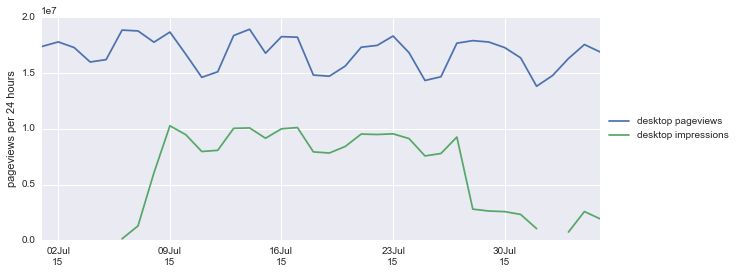

In [30]:
plot_traffic(pv, imp, 'desktop', device_regs['Desktop'], start, stop, hours = 24)

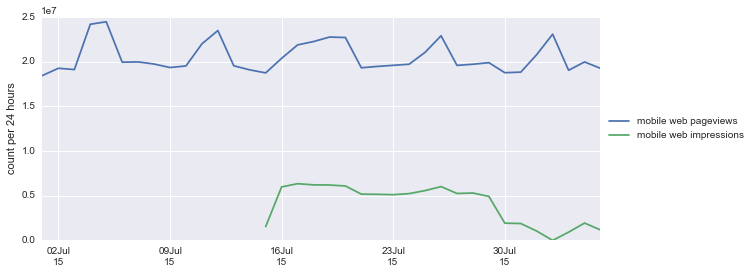

In [31]:
plot_traffic(pv, imp, 'mobile web', device_regs['Mobile'], start, stop, hours = 24)

## Impressions: Large vs Small By Device  

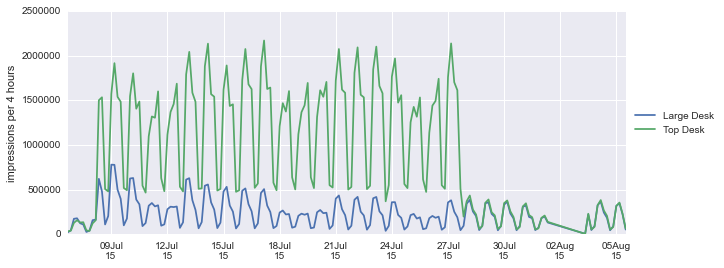

In [32]:
hours = 4
config = {
            'hours' :hours, 
            'ylabel': 'impressions per %d hours' % hours
}

plot_by_time(imp, dsk_regs, **config )


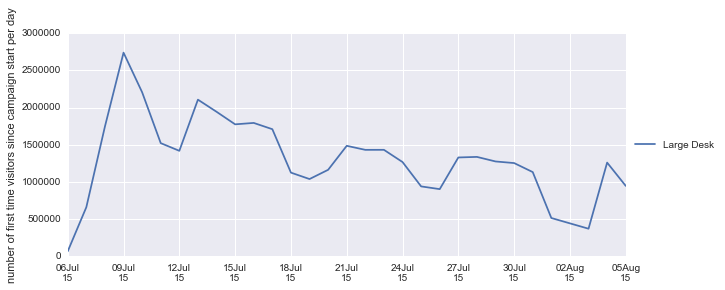

In [33]:
config = {
            'hours' :24, 
            'start': start,
            'ylabel': 'number of first time visitors since campaign start per day'
}

d = plot_by_time(imp, {'Large Desk': dsk_regs['Large Desk']}, **config )

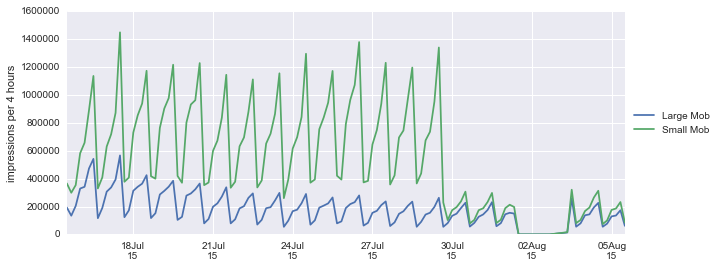

In [34]:
hours = 4
config = {
            'hours' :hours, 
            'start': '2014-12-1 00',
            'ylabel': 'impressions per %d hours' % hours

}
plot_by_time(imp, mob_regs, **config )


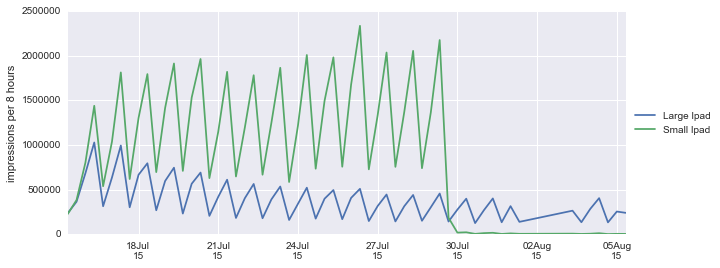

In [35]:

hours = 8
config = {
            'hours' :hours, 
            'ylabel': 'impressions per %d hours' % hours
}
plot_by_time(imp, ipd_regs, **config )

## Donations: Large vs Small By Device 

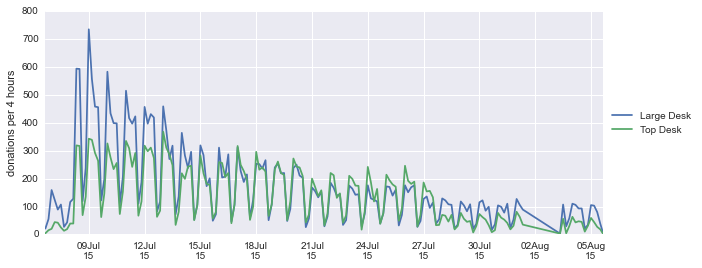

In [36]:
hours = 4
config = {
            'hours' :hours, 
            'ylabel': 'donations per %d hours' % hours
}

plot_by_time(don, dsk_regs, **config)


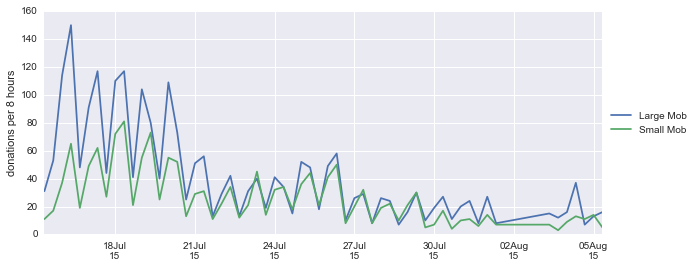

In [37]:
hours = 8
config = {
            'hours' :hours, 
            'ylabel': 'donations per %d hours' %hours
}
plot_by_time(don, mob_regs, **config )


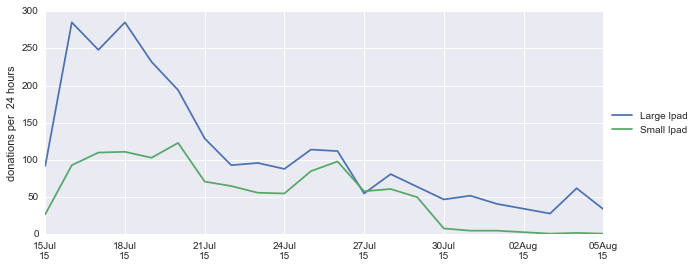

In [38]:
hours = 24
config = {
            'hours' :hours, 
            'start': start,
            'ylabel': 'donations per  %d hours' % hours
}
plot_by_time(don, ipd_regs, **config )



# Donation Rate: Large vs Small By Device

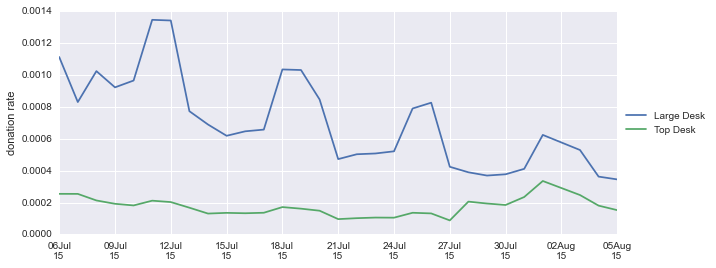

In [39]:
plot_rate_by_time(don, imp, dsk_regs, hours = 24)

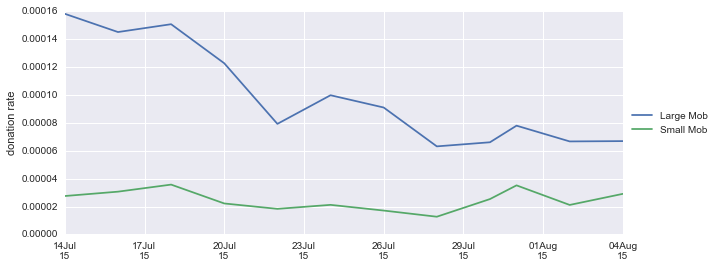

In [40]:
plot_rate_by_time(don, imp, mob_regs, hours = 48 )

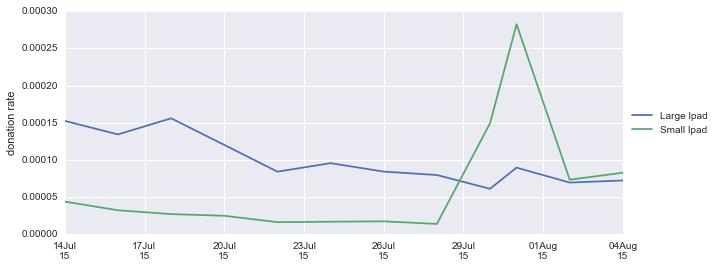

In [41]:
plot_rate_by_time(don, imp, ipd_regs, hours = 48 )

## Large Banner Donation Rate By Device

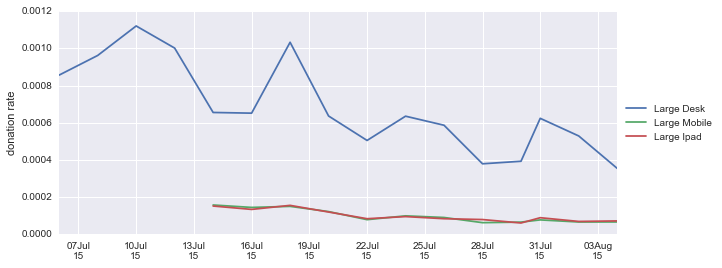

In [42]:
plot_rate_by_time(don, imp, lg_regs, hours = 48 )

## Small Banner Donation Rate By Device

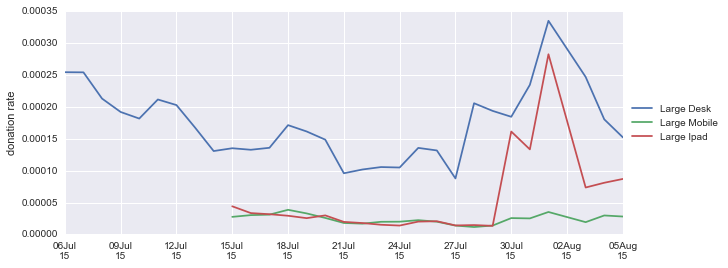

In [43]:
plot_rate_by_time(don, imp, sm_regs, hours = 24 )

## Amount/Day by Banner Size

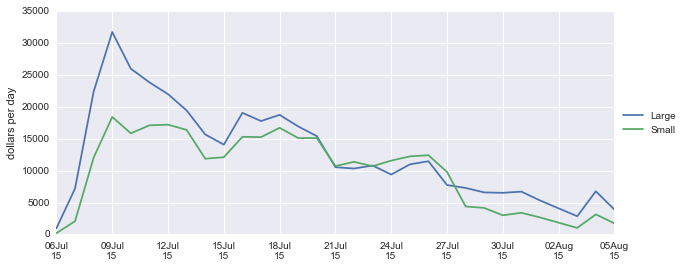

In [44]:
config = {
        'hours' : 24, 
        'amount' : True,
        'ylabel' : 'dollars per day'
}

fig = plot_by_time(don, size_regs, **config )

## Amount/Day by Device

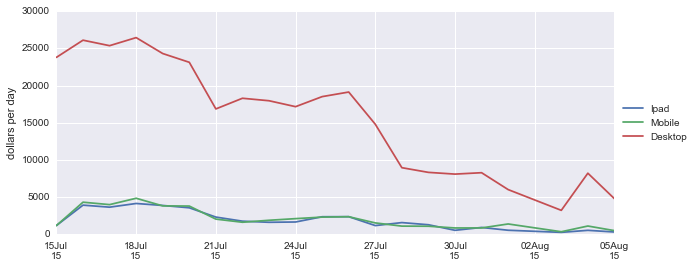

In [45]:
config = {
        'hours' : 24, 
        'amount' : True,
        'start' : '2014-12-3 00',
        'ylabel' : 'dollars per day'
}


fig = plot_by_time(don, device_regs, **config )

## Cumulative Total per Day By Device

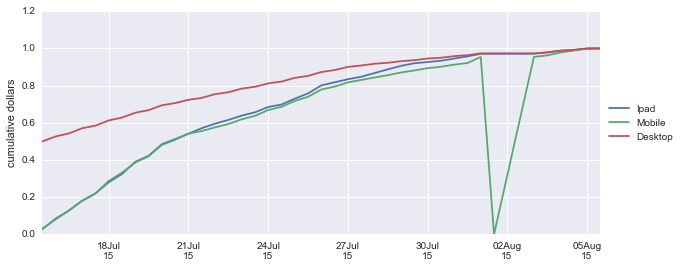

In [46]:
config = {
    'hours': 12,
    'amount': True,
    'cum' : True,
    'ylabel' : 'cumulative dollars',
    'interactive': False,
    'normalize' : True
}

plot_by_time(don, device_regs , **config)


## Quick view of Donation Amount Totals

In [47]:
def get_dollar_break_downs(regs):
    d_totals = pd.DataFrame()
    for name, reg in regs.items():
        counts = don.ix[don.name.str.match(reg).apply(bool)]['amount']
        d_totals[name] = [counts.sum().astype(int)]
    return d_totals

In [48]:
get_dollar_break_downs(all_regs)

,Desktop Large,Desktop Small,Mobile Large,Mobile Small,Ipad Large,Ipad Samll
0,336315,271915,25891,17426,26151,13668


In [49]:
get_dollar_break_downs(size_regs)

,Large,Small
0,388357,303010


In [50]:
get_dollar_break_downs(device_regs)

,Ipad,Mobile,Desktop
0,39819,43317,608231


## Quick View of Donation Number totals

In [51]:
def get_donation_number_break_downs(regs):
    d_totals = pd.DataFrame()
    for name, reg in regs.items():
        counts = don.ix[don.name.str.match(reg).apply(bool)]['n']
        d_totals[name] = [counts.sum()]
    return d_totals


In [52]:
get_donation_number_break_downs(all_regs)

,Desktop Large,Desktop Small,Mobile Large,Mobile Small,Ipad Large,Ipad Samll
0,28691,23057,2402,1543,2432,1188


In [53]:
get_donation_number_break_downs(size_regs)

,Large,Small
0,33525,25788


In [54]:
get_donation_number_break_downs(device_regs)

,Ipad,Mobile,Desktop
0,3620,3945,51748


## Quick View of Average Donations

In [55]:
def get_average_donation_break_downs(regs):
    d_totals = pd.DataFrame()
    for name, reg in regs.items():
        counts = don.ix[don.name.str.match(reg).apply(bool)]['n']
        amounts = don.ix[don.name.str.match(reg).apply(bool)]['amount']
        d_totals[name] = ['%.2f' % (amounts.sum() / counts.sum())]
    return d_totals

In [56]:
get_average_donation_break_downs(all_regs)

,Desktop Large,Desktop Small,Mobile Large,Mobile Small,Ipad Large,Ipad Samll
0,11.72,11.79,10.78,11.29,10.75,11.51


In [57]:
get_average_donation_break_downs(size_regs)

,Large,Small
0,11.58,11.75


In [58]:
get_average_donation_break_downs(device_regs)

,Ipad,Mobile,Desktop
0,11.00,10.98,11.75


## Quick View of Impression Number Totals

In [59]:
def get_impression_break_downs(regs):
    d_totals = pd.DataFrame()
    for name, reg in regs.items():
        counts = imp.ix[imp.name.str.match(reg).apply(bool)]['n']
        d_totals[name] = [counts.sum()]
    return d_totals

In [60]:
get_impression_break_downs(all_regs)

,Desktop Large,Desktop Small,Mobile Large,Mobile Small,Ipad Large,Ipad Samll
0,39913000,155881900,22236100,66885700,22510700,54935600


In [61]:
get_impression_break_downs(size_regs)

,Large,Small
0,84659800,277703200


In [62]:
get_impression_break_downs(device_regs)

,Ipad,Mobile,Desktop
0,77446300,89121800,195794900


## Quick View of Donation Rates

In [63]:
def get_donation_rate_break_downs(regs):
    d_totals = pd.DataFrame()
    for name, reg in regs.items():
        den = imp.ix[imp.name.str.match(reg).apply(bool)]['n']
        num = don.ix[don.name.str.match(reg).apply(bool)]['n']
        d_totals[name] = ['%.5f' % (num.sum()/den.sum())]
    return d_totals

In [64]:
get_donation_rate_break_downs(all_regs)

,Desktop Large,Desktop Small,Mobile Large,Mobile Small,Ipad Large,Ipad Samll
0,0.00072,0.00015,0.00011,0.00002,0.00011,0.00002


In [65]:
get_donation_rate_break_downs(size_regs)

,Large,Small
0,0.00040,0.00009


In [66]:
get_donation_rate_break_downs(device_regs)

,Ipad,Mobile,Desktop
0,0.00005,0.00004,0.00026


# Conversion Rates by device and processor

In [67]:
conv_dsk = get_conversion_clicks(start, stop, dsk_campaign)
conv_mob = get_conversion_clicks(start, stop, mob_campaign)
conv_ipd = get_conversion_clicks(start, stop, ipd_campaign)

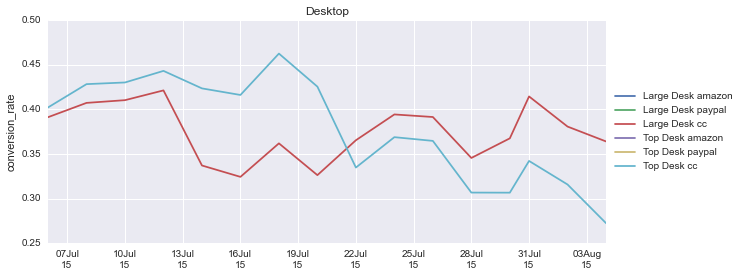

In [68]:
plot_conversion_rate(conv_dsk ,dsk_regs, hours = 48, title = 'Desktop' )

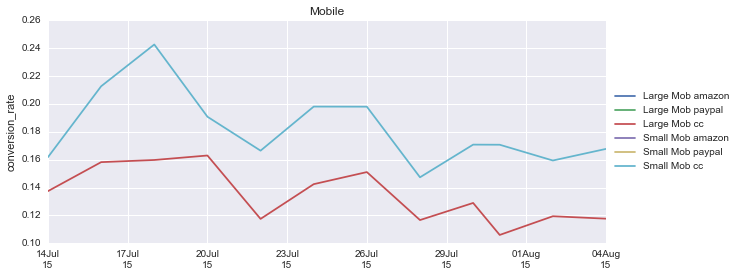

In [69]:
plot_conversion_rate(conv_mob ,mob_regs, hours = 48, title = 'Mobile' )

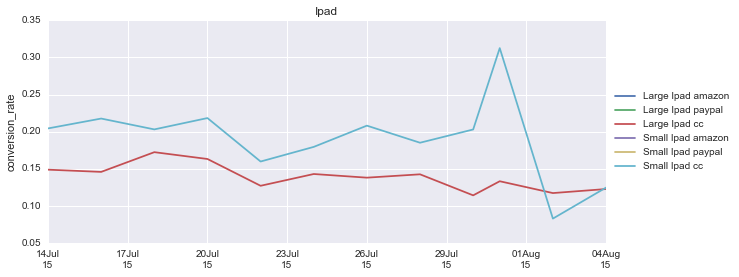

In [70]:
plot_conversion_rate(conv_ipd ,ipd_regs, hours = 48, title = 'Ipad' )